<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-(top-down-method)" data-toc-modified-id="Introduction-(top-down-method)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction (top down method)</a></span></li><li><span><a href="#Script-setup" data-toc-modified-id="Script-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Script setup</a></span></li><li><span><a href="#Data-directory-preparation" data-toc-modified-id="Data-directory-preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data directory preparation</a></span></li><li><span><a href="#Data-file-preperation" data-toc-modified-id="Data-file-preperation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data file preperation</a></span></li><li><span><a href="#Load-data-functions" data-toc-modified-id="Load-data-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load data functions</a></span></li><li><span><a href="#Load-data-sets" data-toc-modified-id="Load-data-sets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load data sets</a></span></li><li><span><a href="#Methodology-(without-all-industrial-heat)" data-toc-modified-id="Methodology-(without-all-industrial-heat)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Methodology (without all industrial heat)</a></span><ul class="toc-item"><li><span><a href="#Energy-related-calculations" data-toc-modified-id="Energy-related-calculations-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Energy related calculations</a></span></li><li><span><a href="#Emissions-related-calculations" data-toc-modified-id="Emissions-related-calculations-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Emissions related calculations</a></span></li><li><span><a href="#Carbon-intensity-calculation" data-toc-modified-id="Carbon-intensity-calculation-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Carbon intensity calculation</a></span></li></ul></li><li><span><a href="#Methodology-(with-all-industrial-heat)" data-toc-modified-id="Methodology-(with-all-industrial-heat)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Methodology (with all industrial heat)</a></span><ul class="toc-item"><li><span><a href="#Energy-related-calculations" data-toc-modified-id="Energy-related-calculations-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Energy related calculations</a></span></li><li><span><a href="#Emissions-related-calculations" data-toc-modified-id="Emissions-related-calculations-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Emissions related calculations</a></span></li><li><span><a href="#Carbon-intensity-calculation" data-toc-modified-id="Carbon-intensity-calculation-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Carbon intensity calculation</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Plots" data-toc-modified-id="Plots-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#CI-for-the-10-largest-energy-consumer-countries" data-toc-modified-id="CI-for-the-10-largest-energy-consumer-countries-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>CI for the 10 largest energy consumer countries</a></span></li><li><span><a href="#CI-for-the-three-base-years-for-all-countries" data-toc-modified-id="CI-for-the-three-base-years-for-all-countries-9.1.2"><span class="toc-item-num">9.1.2&nbsp;&nbsp;</span>CI for the three base years for all countries</a></span></li><li><span><a href="#Comparing-CI-with-and-without-industrial-heat" data-toc-modified-id="Comparing-CI-with-and-without-industrial-heat-9.1.3"><span class="toc-item-num">9.1.3&nbsp;&nbsp;</span>Comparing CI with and without industrial heat</a></span></li></ul></li></ul></li><li><span><a href="#Export-final-CI-to-csv" data-toc-modified-id="Export-final-CI-to-csv-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Export final CI to csv</a></span></li></ul></div>

# Introduction (top down method)

In this script, we determine country specific carbon intensity factors (CI) for European countries. The applied method is based on a published procedures from the European Environment Agency (EEA).

EEA method documentation: https://www.eea.europa.eu/data-and-maps/data/co2-intensity-of-electricity-generation/

# Script setup

In [1]:
import os
import logging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from IPython.display import Image 

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [15, 10]

#helpers
from helpers import get_country
from helpers import aligndata

# Data directory preparation

Create input, processed and output folders if they don't exist
If the paths are relative, the corresponding folders will be created inside the current working directory.
- input -> all needed input data
- processed -> save point and exchange with other scripts
- output -> final emission factors

In [2]:
input_directory_path = os.path.join('input')
top_down_method_input_directory_path = os.path.join('input', 'top_down_methode')
processed_directory_path = 'processed'
output_directory_path = os.path.join('output')

os.makedirs(input_directory_path, exist_ok=True)
os.makedirs(top_down_method_input_directory_path, exist_ok=True)
os.makedirs(processed_directory_path, exist_ok=True)
os.makedirs(output_directory_path, exist_ok=True)

# Data file preperation

The directory `input/top_down_methode` should contain all necessary raw data files.

- 1) Eurostat energy balance database https://ec.europa.eu/eurostat/web/energy/data/database
    - Complete energy balances as ZIP archive -> nrg_bal_c.tsv (tab separated file) https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/nrg_bal_c.tsv.gz

- 2) National emissions reported to the UNFCCC and to the EU Greenhouse Gas Monitoring Mechanism https://www.eea.europa.eu/data-and-maps/data/national-emissions-reported-to-the-unfccc-and-to-the-eu-greenhouse-gas-monitoring-mechanism-16
    - Reported emissions as ZIP archive -> UNFCCC_v23.csv (ASCII delimited) https://www.eea.europa.eu/data-and-maps/data/national-emissions-reported-to-the-unfccc-and-to-the-eu-greenhouse-gas-monitoring-mechanism-16/national-greenhouse-gas-inventories-ipcc-common-reporting-format-sector-classification/ascii-delimited-zip-2/at_download/file



In [3]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(top_down_method_input_directory_path) :
    print("The directory for the method is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(top_down_method_input_directory_path, fn) for fn in os.listdir(top_down_method_input_directory_path)]

print(filenames)

['input\\top_down_methode\\methodology.png', 'input\\top_down_methode\\nrg_bal_c.csv', 'input\\top_down_methode\\UNFCCC_v23.csv']


# Load data functions

In [4]:
def load_energy_balance_data(path, fn):
    """
    Load the raw energy balances reported in the Eurostat database for all European countries from input directory.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    logging.info(f'Loading data from {fn}')
    
    df = pd.read_csv(os.path.join(path, fn),sep = '\t', header=0)
    # rename column (0) for identifier
    df = df.rename(columns = {df.columns[0]:'use_substance_unit_country'})

    return df


def load_UNFCC_data(path, fn):
    """
    Load and standardize the raw UNFCC database for all European countries from input directory.
    Filter data: only sector '1.A.1.a' (CO2 for all energy production from Public Electricity Generation, Public Combined Heat and Power and Public Heat Plants)
    Filter data: only direct CO2 emissions
    Filter data: only from year 1990 upwards
    CO2 Emissions in million tones Tg

    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename

    """
    

    logging.info(f'Loading data from {fn}')
    
    df = pd.read_csv(os.path.join(path, fn), sep = ',', header =0, encoding = 'unicode_escape',low_memory=False)
    
    #sector and pollutant selection
    sector = '1.A.1.a' # CO2 for all energy production from Public Electricity Generation, Public Combined Heat and Power and Public Heat Plants
    pollutant = 'CO2' # only direct CO2
    
    df = df.query('Sector_code == @sector').query('Pollutant_name == @pollutant')
    
    # data only from year 1990 upwards 
    df = df[~df['Year'].isin(['1985-1987'])] # skip an entry with several years
    # convert all years to string
    df['Year']= df['Year'].apply(lambda x: int(x)).apply(lambda x: str(x))
    
    df = df[~df['Year'].isin(['1985','1986','1987','1988','1989'])] # filter for years
    
    # Create table with countries as columns and years as rows 
    df = pd.pivot_table(df, values = 'emissions', index = 'Year', columns = ['Country_code'])

    return df

# Load data sets

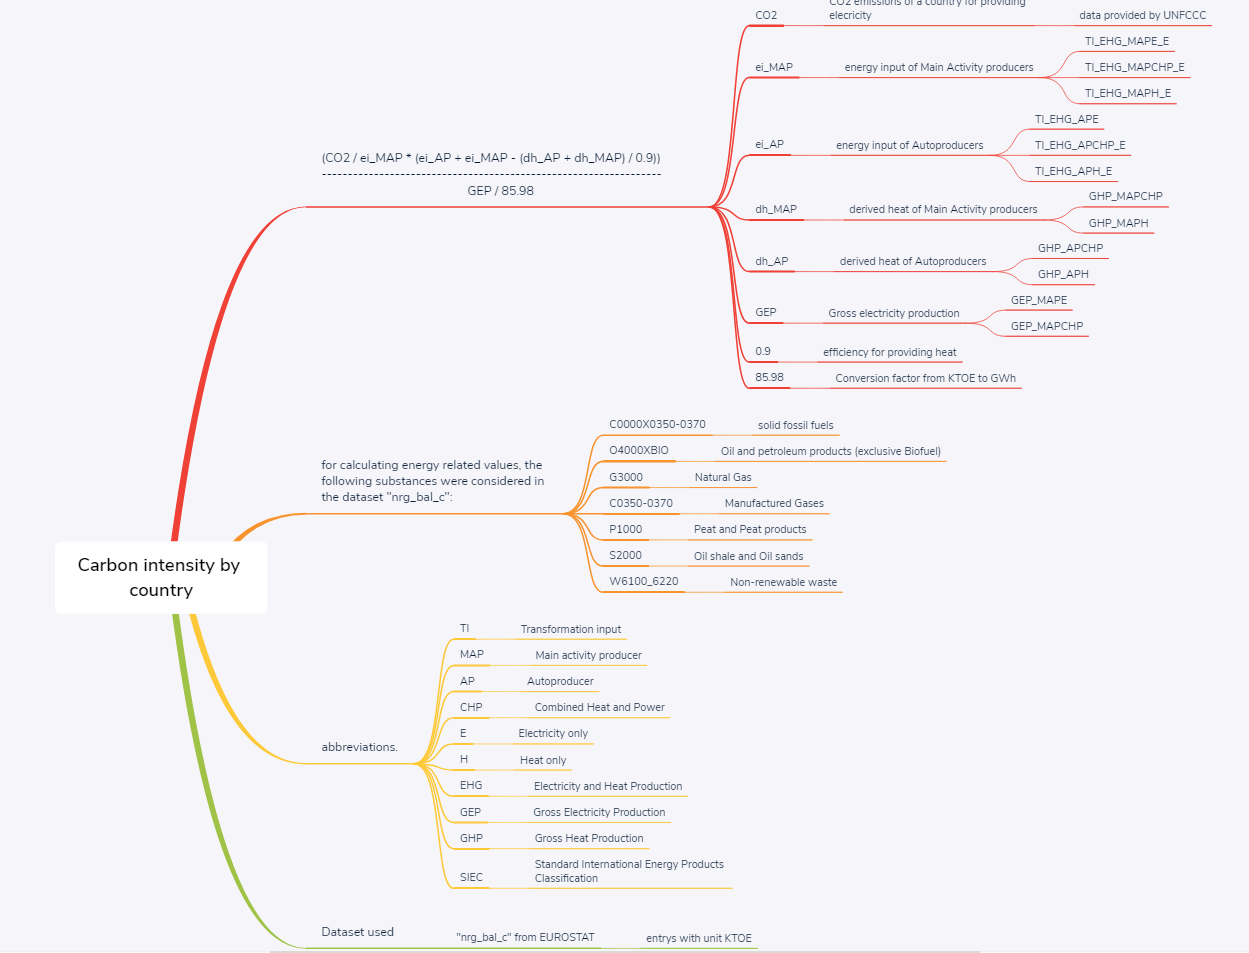

In [5]:
# The following image give information about the used data sets, abbreviations and calculation method
Image(filename= os.path.join(top_down_method_input_directory_path, 'methodology.png'))

#### load CO2_emissions reported from UNFCC

In [6]:
CO2_emissions_UNFCC = load_UNFCC_data(top_down_method_input_directory_path, 'UNFCCC_v23.csv')
# attention public electricity and heat generation only no autoproducers

# rename UK to GB
CO2_emissions_UNFCC.rename(columns={'UK':'GB'}, inplace=True)

# missing countries MD, ME, MK, RS,

#### load energy balance sheet reported from eurostat

In [7]:
nrg_bal_c = load_energy_balance_data(top_down_method_input_directory_path, 'nrg_bal_c.csv')

In [8]:
# replace EU country code by ISO country code
nrg_bal_c.use_substance_unit_country.replace(to_replace='EL', value='GR' , regex=True, inplace=True)
nrg_bal_c.use_substance_unit_country.replace(to_replace='UK', value='GB' , regex=True, inplace=True)

#missing countries: CH, LI

# Methodology (without all industrial heat)

## Energy related calculations

Calculation for ei_MAP, ei_AP, dh_MAP, dh_AP, GEP
see image for further information

In [9]:
#using only substances provided in the example excel-sheet (Austria Example). Nevertheless, the methodology on the website
#suggests using two more substances namely primary biogases and primary solid biofuels

# Solid fossil fuel; C0000X0350-0370;
# Oil and petroleum products (excl. Biofuel); O4000XBIO;
# Natural Gas; G3000;
# Manufactured gases; C0350-0370;
# Peat and peat products; P1000;
# Oil shale and Oil sands; S2000;
#--- not in the example but in the documentation Primary solid biofuels; R5110-5150_W6000RI;
#--- not in the example but in the documentation Primary Biogases; R5300;
# Non-renewable waste; W6100_6220.

# set filter substance

substances = 'C0000X0350-0370|O4000XBIO|G3000|C0350-0370|P1000|S2000|W6100_6220'

In [10]:
#energy input of main activity producers (ei_MAP)
#Transformation input Electricity & heat generation

#Main activity producer electricity only; TI_EHG_MAPE_E
#Main activity producer CHP; TI_EHG_MAPCHP_E
#Main activity producer heat only; TI_EHG_MAPH_E
ei_MAP_string_nrgbalc = 'TI_EHG_MAPE_E|TI_EHG_MAPCHP_E' #|TI_EHG_MAPH_E'


#filter with ei_MAP_string_nrgbalc and substances
ei_MAP = nrg_bal_c.loc[nrg_bal_c['use_substance_unit_country']\
                                    .str.contains(ei_MAP_string_nrgbalc, regex=True)]
ei_MAP = ei_MAP.loc[ei_MAP['use_substance_unit_country']\
                                     .str.contains(substances, regex=True)]
ei_MAP = ei_MAP.loc[ei_MAP['use_substance_unit_country']\
                                    .str.contains(r'^(?=.*KTOE)')]
# split country from identifier
ei_MAP.use_substance_unit_country = ei_MAP.use_substance_unit_country.apply(lambda string: get_country(string))
# rename columns and set index
ei_MAP = ei_MAP.rename(columns = {'use_substance_unit_country':'Country_code'})\
           .set_index('Country_code')\
           .replace(': ',0.)\
           .replace(': z',0.)\
           .apply(lambda x: x.apply(lambda y:float(y)))\
           .groupby(by=ei_MAP.index.name,level = 0).sum()\
           .T

In [11]:
#calculating the energy input of Autoproducters (ei_AP)
#Transformation input Electricity & heat generation

#Autoproducer electricity only; TI_EHG_APE_E
#Autoproducer producer CHP; TI_EHG_APCHP_E
#Autoproducer producer heat only; TI_EHG_APH_E

AP_string = 'TI_EHG_APE_E|TI_EHG_APCHP_E' # |TI_EHG_APH_E'
ei_AP = nrg_bal_c.loc[nrg_bal_c['use_substance_unit_country'].str.contains(AP_string, regex=True)]

ei_AP = ei_AP.loc[ei_AP['use_substance_unit_country']\
                                                    .str.contains(substances,regex=True)]#
ei_AP = ei_AP.loc[ei_AP['use_substance_unit_country']\
                                      .str.contains(r'^(?=.*KTOE)')]
ei_AP.use_substance_unit_country = ei_AP.use_substance_unit_country\
                                                    .apply(lambda string: get_country(string))
ei_AP = ei_AP.rename(columns = {'use_substance_unit_country':'Country_code'})\
           .set_index('Country_code')\
           .replace(': ',0.)\
           .replace(': z',0.)\
           .apply(lambda x: x.apply(lambda y:float(y)))\
           .groupby(by=ei_AP.index.name,level = 0).sum()\
            .T


In [12]:
#calculating the derived heat of main activity producers(dh_MAP)
#Gross heat production

#Main activity producer CHP; GHP_MAPCHP
#Main activity producer heat only; GHP_MAPH

#filter
derived_heat_string_nrgbalc = 'GHP_MAPCHP' #|GHP_MAPH'

dh_MAP = nrg_bal_c.loc[nrg_bal_c['use_substance_unit_country']\
                                     .str.contains(derived_heat_string_nrgbalc, regex=True)]
dh_MAP = dh_MAP.loc[dh_MAP['use_substance_unit_country']\
                                        .str.contains(substances, regex=True)]
dh_MAP = dh_MAP.loc[dh_MAP['use_substance_unit_country']\
                                      .str.contains(r'^(?=.*KTOE)')]
dh_MAP.use_substance_unit_country = dh_MAP.use_substance_unit_country\
                                     .apply(lambda string: get_country(string))
dh_MAP = dh_MAP.rename(columns = {'use_substance_unit_country':'Country_code'})\
           .set_index('Country_code')\
           .replace(': ',0.)\
           .replace(': z',0.)\
           .apply(lambda x: x.apply(lambda y:float(y)))\
           .groupby(by=dh_MAP.index.name,level = 0).sum()\
           .T\
           #/ 0.9 # Estimating 90% efficiency heat production

In [13]:
#calculating the derived heat of Autoproducters (dh_AP)
#Gross heat production

#Autoproducer CHP; GHP_APCHP
#Autoproducer heat only; GHP_APH

dh_AP_string = 'GHP_APCHP' #|GHP_APH'

dh_AP = nrg_bal_c.loc[nrg_bal_c['use_substance_unit_country']\
                                     .str.contains(dh_AP_string, regex=True)]
dh_AP = dh_AP.loc[dh_AP['use_substance_unit_country']\
                                        .str.contains(substances, regex=True)]
dh_AP = dh_AP.loc[dh_AP['use_substance_unit_country']\
                                      .str.contains(r'^(?=.*KTOE)')]
dh_AP.use_substance_unit_country = dh_AP.use_substance_unit_country\
                                     .apply(lambda string: get_country(string))
dh_AP = dh_AP.rename(columns = {'use_substance_unit_country':'Country_code'})\
           .set_index('Country_code')\
           .replace(': ',0.)\
           .replace(': z',0.)\
           .apply(lambda x: x.apply(lambda y:float(y)))\
           .groupby(by=dh_AP.index.name,level = 0).sum()\
           .T\
           #/ 0.9 # Estimating 90% efficiency heat production


In [14]:
#Calculating gross electricity production of main activity producers (GEP)
#Gross electricity production

#Main activity producer electricity only; GEP_MAPE
#Main activity producer CHP; GEP_MAPCHP

MAP_string = 'GEP_MAPE|GEP_MAPCHP'

GEP_MAP = nrg_bal_c.loc[nrg_bal_c['use_substance_unit_country'].str.contains(MAP_string, regex=True)]

GEP_MAP = GEP_MAP.loc[GEP_MAP['use_substance_unit_country']\
                                                      .str.contains(r'^(?=.*KTOE)(?=.*TOTAL)')]
GEP_MAP.use_substance_unit_country = GEP_MAP.use_substance_unit_country\
                                                      .apply(lambda string: get_country(string))
GEP_MAP = GEP_MAP.rename(columns = {'use_substance_unit_country':'Country_code'})\
           .set_index('Country_code')\
           .replace(': ',0.)\
           .replace(': z',0.)\
           .apply(lambda x: x.apply(lambda y:float(y)))\
           .groupby(by=GEP_MAP.index.name,level = 0).sum()\
           .T


In [15]:
#Calculating gross electricity production of Autoproductersof (GEP_AP)

#Gross electricity production

#Autoproducer electricity only; GEP_APE
#Autoproducer CHP; GEP_APCHP

AP_string = 'GEP_APE|GEP_APCHP'

GEP_AP = nrg_bal_c.loc[nrg_bal_c['use_substance_unit_country'].str.contains(AP_string, regex=True)]

GEP_AP = GEP_AP.loc[GEP_AP['use_substance_unit_country']\
                                                    .str.contains(r'^(?=.*KTOE)(?=.*TOTAL)')]
GEP_AP.use_substance_unit_country = GEP_AP.use_substance_unit_country\
                                                    .apply(lambda string: get_country(string))
GEP_AP = GEP_AP.rename(columns = {'use_substance_unit_country':'Country_code'})\
           .set_index('Country_code')\
           .replace(': ',0.)\
           .replace(': z',0.)\
           .apply(lambda x: x.apply(lambda y:float(y)))\
           .groupby(by=GEP_AP.index.name,level = 0).sum()\
           .T


## Emissions related calculations

In [16]:
#filter CO2_emissions_UNFCC using only columns that exist in both dataframes
CO2_cleaned = CO2_emissions_UNFCC[pd.Series(CO2_emissions_UNFCC.columns)[pd.Series(CO2_emissions_UNFCC.columns).apply(lambda x: x in ei_MAP.columns)]]

In [17]:
# fit data to CO2_cleaned data columns and rows

#Transformation input Main activity producer electricity only, CHP and heat
ei_MAP = aligndata(ei_MAP,CO2_cleaned)

#Gross heat production Main activity producer CHP and heat
dh_MAP= aligndata(dh_MAP, CO2_cleaned)

#Transformation input Autoproducer electricity only, CHP and heat
ei_AP = aligndata(ei_AP, CO2_cleaned)

#Gross heat production Autoproducer CHP and heat
dh_AP = aligndata(dh_AP, CO2_cleaned)

#electricity production Main activity producer
GEP_MAP= aligndata(GEP_MAP, CO2_cleaned) 

#electricity production Autoproducer
GEP_AP = aligndata(GEP_AP, CO2_cleaned)

#Gross electricity production
GEP = GEP_MAP + GEP_AP


In [18]:
GEP_AP.columns

Index(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR',
       'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL',
       'PT', 'RO', 'SE', 'SI', 'SK', 'TR', 'GB'],
      dtype='object', name='Country_code')

## Carbon intensity calculation

In [19]:
# CO2 intensity of total electricity generation
# Is calculated by the ratio of all CO2 emissions from all electricity production (public main activity producers and autoproducers)
# against total electricity generation including all sources.

# Main activity producer

# First, the CO2 emissions of gross electricity production:
# total CO2 emissions multiplying by
# electricity production (plus energy losses) from public conventional thermal power stations
# versus all electrical energy production from public power stations and combined heat power station

# CO2 emissions * ((electrical energy + energy losses)/(electrical energy + derived heat + energy losses))

# 1) assumption
# (electrical energy + energy losses) = (electrical energy + derived heat + energy losses)–(derived heat)

# (electrical energy + derived heat + energy losses) = ei_MAP
 
# 2) assumption
# energy input calculation for derived heat with eff. of 0.9
# (derived heat) = (dh_MAP / 0.9)

# resulting in:
# energy input electrical energy production
# (electrical energy + derived heat + energy losses)–(derived heat) = ei_MAP - (dh_MAP / 0.9)
ei_elec_MAP = ei_MAP - (dh_MAP / 0.9)

# ((electrical energy + energy losses)/(electrical energy + derived heat + energy losses)) = ((ei_MAP - (dh_MAP / 0.9)) / ei_MAP) 

# share of CO2 emissions of electricity production Main activity producer
CO2_from_MAP_elec = CO2_cleaned * (ei_elec_MAP / ei_MAP) 


# Autoproducer

# The reported CO2 emissions in class 1A1a do not include CO2 emissions from autoproducers.
# Emissions from autoproducers were therefore estimated

# electricity output of autoproducers (same assumption as above)
ei_elec_AP = ei_AP - (dh_AP / 0.9)

# 1) assumption
# this was done by multiplying the electricity output of autoproducers 
# by a calculated CO2 emission ratio for main activity producers


# share of CO2 emissions of electricity production Autoproducer
CO2_from_AP_elec = CO2_from_MAP_elec * (ei_elec_AP / ei_elec_MAP)


# CO2 intensity of total electricity generation

# sum of CO2 from MAP and CO2 from AP [CO2 in Gigagramm (Gg)] / Gross electricity production [GWh](85.98: Ktoe-->GWh)

CI_without_heat = ((CO2_from_MAP_elec + CO2_from_AP_elec)/(GEP/85.98)) # CO2 intensity in [g CO2/kWh]

# Methodology (with all industrial heat)

## Energy related calculations

Calculation for ei_MAP, ei_AP, dh_MAP, dh_AP, GEP
see image for further information

In [20]:
#using only substances provided in the example excel-sheet (Austria Example). Nevertheless, the methodology on the website
#suggests using two more substances namely primary biogases and primary solid biofuels

# Solid fossil fuel; C0000X0350-0370;
# Oil and petroleum products (excl. Biofuel); O4000XBIO;
# Natural Gas; G3000;
# Manufactured gases; C0350-0370;
# Peat and peat products; P1000;
# Oil shale and Oil sands; S2000;
#--- not in the example but in the documentation Primary solid biofuels; R5110-5150_W6000RI;
#--- not in the example but in the documentation Primary Biogases; R5300;
# Non-renewable waste; W6100_6220.

# set filter substance

substances = 'C0000X0350-0370|O4000XBIO|G3000|C0350-0370|P1000|S2000|W6100_6220'

In [21]:
#energy input of main activity producers (ei_MAP)
#Transformation input Electricity & heat generation

#Main activity producer electricity only; TI_EHG_MAPE_E
#Main activity producer CHP; TI_EHG_MAPCHP_E
#Main activity producer heat only; TI_EHG_MAPH_E
ei_MAP_string_nrgbalc = 'TI_EHG_MAPE_E|TI_EHG_MAPCHP_E|TI_EHG_MAPH_E'


#filter with ei_MAP_string_nrgbalc and substances
ei_MAP = nrg_bal_c.loc[nrg_bal_c['use_substance_unit_country']\
                                    .str.contains(ei_MAP_string_nrgbalc, regex=True)]
ei_MAP = ei_MAP.loc[ei_MAP['use_substance_unit_country']\
                                     .str.contains(substances, regex=True)]
ei_MAP = ei_MAP.loc[ei_MAP['use_substance_unit_country']\
                                    .str.contains(r'^(?=.*KTOE)')]
# split country from identifier
ei_MAP.use_substance_unit_country = ei_MAP.use_substance_unit_country.apply(lambda string: get_country(string))
# rename columns and set index
ei_MAP = ei_MAP.rename(columns = {'use_substance_unit_country':'Country_code'})\
           .set_index('Country_code')\
           .replace(': ',0.)\
           .replace(': z',0.)\
           .apply(lambda x: x.apply(lambda y:float(y)))\
           .groupby(by=ei_MAP.index.name,level = 0).sum()\
           .T

In [22]:
#calculating the energy input of Autoproducters (ei_AP)
#Transformation input Electricity & heat generation

#Autoproducer electricity only; TI_EHG_APE_E
#Autoproducer producer CHP; TI_EHG_APCHP_E
#Autoproducer producer heat only; TI_EHG_APH_E

AP_string = 'TI_EHG_APE_E|TI_EHG_APCHP_E|TI_EHG_APH_E'
ei_AP = nrg_bal_c.loc[nrg_bal_c['use_substance_unit_country'].str.contains(AP_string, regex=True)]

ei_AP = ei_AP.loc[ei_AP['use_substance_unit_country']\
                                                    .str.contains(substances,regex=True)]#
ei_AP = ei_AP.loc[ei_AP['use_substance_unit_country']\
                                      .str.contains(r'^(?=.*KTOE)')]
ei_AP.use_substance_unit_country = ei_AP.use_substance_unit_country\
                                                    .apply(lambda string: get_country(string))
ei_AP = ei_AP.rename(columns = {'use_substance_unit_country':'Country_code'})\
           .set_index('Country_code')\
           .replace(': ',0.)\
           .replace(': z',0.)\
           .apply(lambda x: x.apply(lambda y:float(y)))\
           .groupby(by=ei_AP.index.name,level = 0).sum()\
            .T


In [23]:
#calculating the derived heat of main activity producers(dh_MAP)
#Gross heat production

#Main activity producer CHP; GHP_MAPCHP
#Main activity producer heat only; GHP_MAPH

#filter
derived_heat_string_nrgbalc = 'GHP_MAPCHP|GHP_MAPH'

dh_MAP = nrg_bal_c.loc[nrg_bal_c['use_substance_unit_country']\
                                     .str.contains(derived_heat_string_nrgbalc, regex=True)]
dh_MAP = dh_MAP.loc[dh_MAP['use_substance_unit_country']\
                                        .str.contains(substances, regex=True)]
dh_MAP = dh_MAP.loc[dh_MAP['use_substance_unit_country']\
                                      .str.contains(r'^(?=.*KTOE)')]
dh_MAP.use_substance_unit_country = dh_MAP.use_substance_unit_country\
                                     .apply(lambda string: get_country(string))
dh_MAP = dh_MAP.rename(columns = {'use_substance_unit_country':'Country_code'})\
           .set_index('Country_code')\
           .replace(': ',0.)\
           .replace(': z',0.)\
           .apply(lambda x: x.apply(lambda y:float(y)))\
           .groupby(by=dh_MAP.index.name,level = 0).sum()\
           .T\
           #/ 0.9 # Estimating 90% efficiency heat production

In [24]:
#calculating the derived heat of Autoproducters (dh_AP)
#Gross heat production

#Autoproducer CHP; GHP_APCHP
#Autoproducer heat only; GHP_APH

dh_AP_string = 'GHP_APCHP|GHP_APH'

dh_AP = nrg_bal_c.loc[nrg_bal_c['use_substance_unit_country']\
                                     .str.contains(dh_AP_string, regex=True)]
dh_AP = dh_AP.loc[dh_AP['use_substance_unit_country']\
                                        .str.contains(substances, regex=True)]
dh_AP = dh_AP.loc[dh_AP['use_substance_unit_country']\
                                      .str.contains(r'^(?=.*KTOE)')]
dh_AP.use_substance_unit_country = dh_AP.use_substance_unit_country\
                                     .apply(lambda string: get_country(string))
dh_AP = dh_AP.rename(columns = {'use_substance_unit_country':'Country_code'})\
           .set_index('Country_code')\
           .replace(': ',0.)\
           .replace(': z',0.)\
           .apply(lambda x: x.apply(lambda y:float(y)))\
           .groupby(by=dh_AP.index.name,level = 0).sum()\
           .T\
           #/ 0.9 # Estimating 90% efficiency heat production


In [25]:
#Calculating gross electricity production of main activity producers (GEP)
#Gross electricity production

#Main activity producer electricity only; GEP_MAPE
#Main activity producer CHP; GEP_MAPCHP

MAP_string = 'GEP_MAPE|GEP_MAPCHP'

GEP_MAP = nrg_bal_c.loc[nrg_bal_c['use_substance_unit_country'].str.contains(MAP_string, regex=True)]

GEP_MAP = GEP_MAP.loc[GEP_MAP['use_substance_unit_country']\
                                                      .str.contains(r'^(?=.*KTOE)(?=.*TOTAL)')]
GEP_MAP.use_substance_unit_country = GEP_MAP.use_substance_unit_country\
                                                      .apply(lambda string: get_country(string))
GEP_MAP = GEP_MAP.rename(columns = {'use_substance_unit_country':'Country_code'})\
           .set_index('Country_code')\
           .replace(': ',0.)\
           .replace(': z',0.)\
           .apply(lambda x: x.apply(lambda y:float(y)))\
           .groupby(by=GEP_MAP.index.name,level = 0).sum()\
           .T


In [26]:
#Calculating gross electricity production of Autoproductersof (GEP_AP)

#Gross electricity production

#Autoproducer electricity only; GEP_APE
#Autoproducer CHP; GEP_APCHP

AP_string = 'GEP_APE|GEP_APCHP'

GEP_AP = nrg_bal_c.loc[nrg_bal_c['use_substance_unit_country'].str.contains(AP_string, regex=True)]

GEP_AP = GEP_AP.loc[GEP_AP['use_substance_unit_country']\
                                                    .str.contains(r'^(?=.*KTOE)(?=.*TOTAL)')]
GEP_AP.use_substance_unit_country = GEP_AP.use_substance_unit_country\
                                                    .apply(lambda string: get_country(string))
GEP_AP = GEP_AP.rename(columns = {'use_substance_unit_country':'Country_code'})\
           .set_index('Country_code')\
           .replace(': ',0.)\
           .replace(': z',0.)\
           .apply(lambda x: x.apply(lambda y:float(y)))\
           .groupby(by=GEP_AP.index.name,level = 0).sum()\
           .T


## Emissions related calculations

In [27]:
#filter CO2_emissions_UNFCC using only columns that exist in both dataframes
CO2_cleaned = CO2_emissions_UNFCC[pd.Series(CO2_emissions_UNFCC.columns)[pd.Series(CO2_emissions_UNFCC.columns).apply(lambda x: x in ei_MAP.columns)]]

In [28]:
# fit data to CO2_cleaned data columns and rows

#Transformation input Main activity producer electricity only, CHP and heat
ei_MAP = aligndata(ei_MAP,CO2_cleaned)

#Gross heat production Main activity producer CHP and heat
dh_MAP= aligndata(dh_MAP, CO2_cleaned)

#Transformation input Autoproducer electricity only, CHP and heat
ei_AP = aligndata(ei_AP, CO2_cleaned)

#Gross heat production Autoproducer CHP and heat
dh_AP = aligndata(dh_AP, CO2_cleaned)

#electricity production Main activity producer
GEP_MAP= aligndata(GEP_MAP, CO2_cleaned) 

#electricity production Autoproducer
GEP_AP = aligndata(GEP_AP, CO2_cleaned)

#Gross electricity production
GEP = GEP_MAP + GEP_AP


In [29]:
GEP_AP.columns

Index(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR',
       'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL',
       'PT', 'RO', 'SE', 'SI', 'SK', 'TR', 'GB'],
      dtype='object', name='Country_code')

## Carbon intensity calculation

In [30]:
# CO2 intensity of total electricity generation
# Is calculated by the ratio of all CO2 emissions from all electricity production (public main activity producers and autoproducers)
# against total electricity generation including all sources.

# Main activity producer

# First, the CO2 emissions of gross electricity production:
# total CO2 emissions multiplying by
# electricity production (plus energy losses) from public conventional thermal power stations
# versus all electrical energy production from public power stations and combined heat power station

# CO2 emissions * ((electrical energy + energy losses)/(electrical energy + derived heat + energy losses))

# 1) assumption
# (electrical energy + energy losses) = (electrical energy + derived heat + energy losses)–(derived heat)

# (electrical energy + derived heat + energy losses) = ei_MAP
 
# 2) assumption
# energy input calculation for derived heat with eff. of 0.9
# (derived heat) = (dh_MAP / 0.9)

# resulting in:
# energy input electrical energy production
# (electrical energy + derived heat + energy losses)–(derived heat) = ei_MAP - (dh_MAP / 0.9)
ei_elec_MAP = ei_MAP - (dh_MAP / 0.9)

# ((electrical energy + energy losses)/(electrical energy + derived heat + energy losses)) = ((ei_MAP - (dh_MAP / 0.9)) / ei_MAP) 

# share of CO2 emissions of electricity production Main activity producer
CO2_from_MAP_elec = CO2_cleaned * (ei_elec_MAP / ei_MAP) 


# Autoproducer

# The reported CO2 emissions in class 1A1a do not include CO2 emissions from autoproducers.
# Emissions from autoproducers were therefore estimated

# electricity output of autoproducers (same assumption as above)
ei_elec_AP = ei_AP - (dh_AP / 0.9)

# 1) assumption
# this was done by multiplying the electricity output of autoproducers 
# by a calculated CO2 emission ratio for main activity producers


# share of CO2 emissions of electricity production Autoproducer
CO2_from_AP_elec = CO2_from_MAP_elec * (ei_elec_AP / ei_elec_MAP)


# CO2 intensity of total electricity generation

# sum of CO2 from MAP and CO2 from AP [CO2 in Gigagramm (Gg)] / Gross electricity production [GWh](85.98: Ktoe-->GWh)

CI = ((CO2_from_MAP_elec + CO2_from_AP_elec)/(GEP/85.98)) # CO2 intensity in [g CO2/kWh]

# Results

#### Some results as an overview

In [31]:
CI['AT'].loc['2018']

100.12059317989565

In [32]:
CI_without_heat['AT'].loc['2018']

111.9720280521894

In [33]:
CI['NO'].loc['2018']

18.52339924384958

In [34]:
CI_without_heat['NO'].loc['2018']

29.220090040942182

In [35]:
CI['DE'].loc['2018']

398.9321779040656

In [36]:
CI_without_heat['DE'].loc['2018']

414.34062306704544

## Plots

### CI for the 10 largest energy consumer countries

In [37]:
GEP.loc['2018'].sort_values(ascending=False)[:10].index

Index(['DE', 'FR', 'GB', 'TR', 'IT', 'ES', 'PL', 'SE', 'NO', 'NL'], dtype='object', name='Country_code')

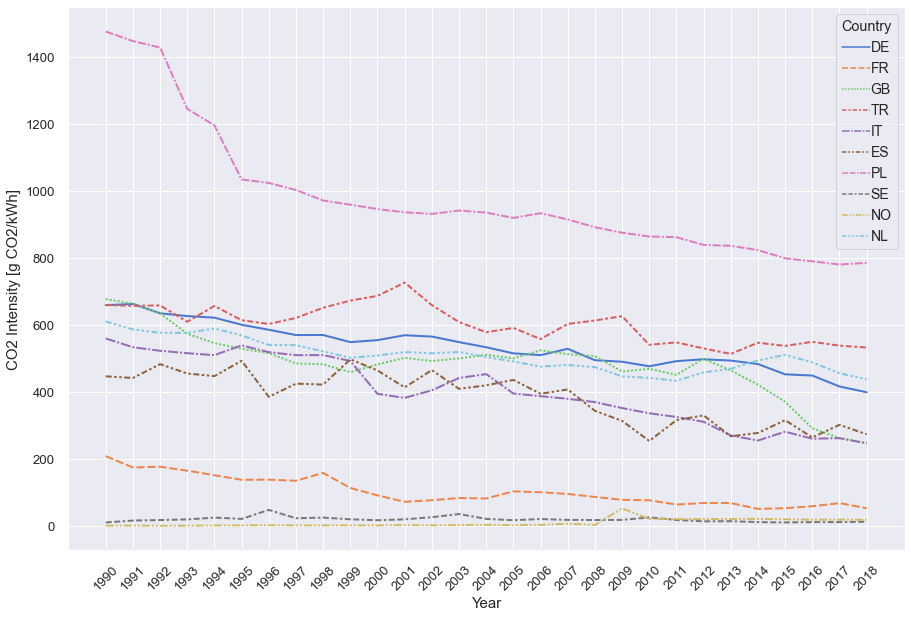

In [38]:
# CI developent from 1990 upto 2018
sns.set(font_scale = 1.2)
fig, ax = plt.subplots()

ax = sns.lineplot(data=CI[GEP.loc['2018'].sort_values(ascending=False)[:10].index],
                  markers=False,
                  dashes=True,
                  linewidth=2,
                  markersize=9,
                  palette=sns.color_palette("muted"),
                  legend='full')


handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels,  loc='upper right',
                   handletextpad=0., columnspacing=0.5, ncol=1,
                   title='Country', fontsize=14, frameon=True)

ax.set_ylabel("CO2 Intensity [g CO2/kWh]", fontsize=15)
ax.set_xlabel("Year", fontsize=15)

ax.tick_params(axis='x', rotation=45)


In [39]:
fig.savefig(os.path.join(output_directory_path + '/_CO2_intensity_by_large_consumer_countries.png'))

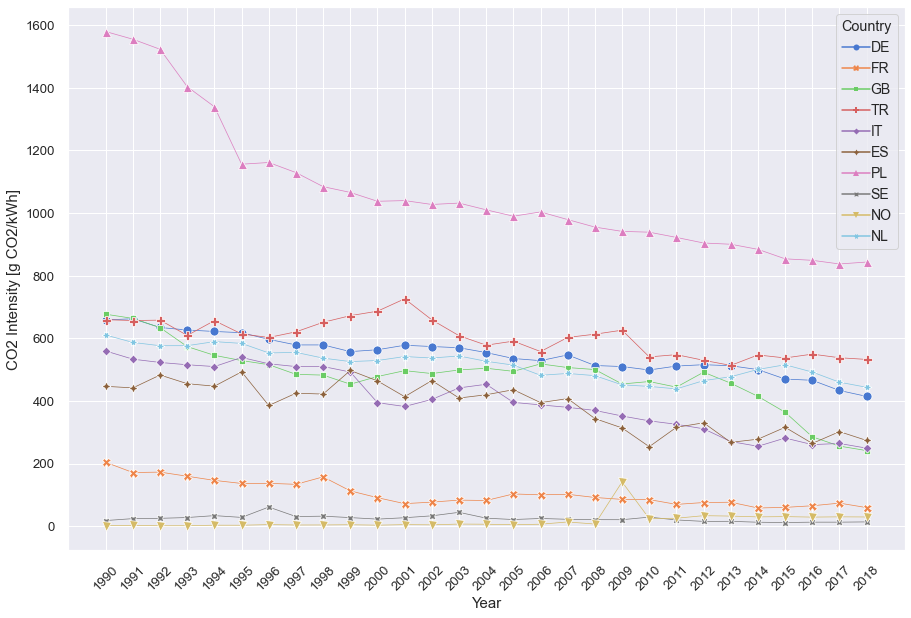

In [40]:
# CI developent from 1990 upto 2018
sns.set(font_scale = 1.2)
fig, ax = plt.subplots()

ax = sns.lineplot(data=CI_without_heat[GEP.loc['2018'].sort_values(ascending=False)[:10].index],
                  markers=True,
                  dashes=False,
                  linewidth=0.7,
                  markersize=9,
                  palette=sns.color_palette("muted"),
                  legend='full')



handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels,  loc='upper right',
                   handletextpad=0., columnspacing=0.5, ncol=1,
                   title='Country', fontsize=14, frameon=True)

ax.set_ylabel("CO2 Intensity [g CO2/kWh]", fontsize=15)
ax.set_xlabel("Year", fontsize=15)

ax.tick_params(axis='x', rotation=45)


In [41]:
fig.savefig(os.path.join(output_directory_path + '/_CO2_intensity_by_large_consumer_countries_without_heat.png'))

### CI for the three base years for all countries

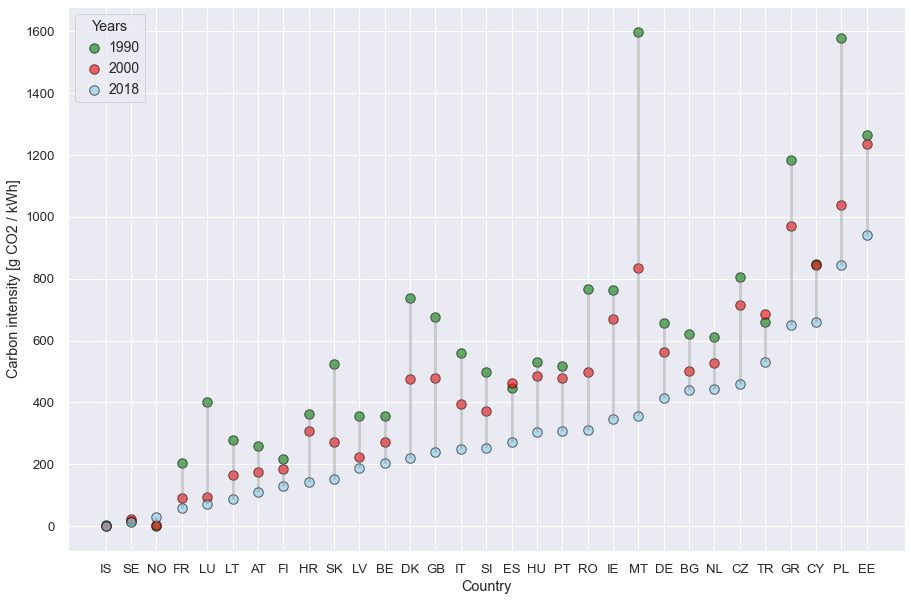

In [42]:
CI_compar = CI_without_heat.loc[['2018','2010','2000','1990']].transpose()

# Reorder it following the values of the first value:
ordered_df = CI_compar.sort_values(by='2018', ascending=True)
my_range=range(1,len(CI_compar.index)+1)

fig, ax = plt.subplots(1,1)

# The vertical plot is made using the vline function
ax.vlines(x=my_range, ymin=ordered_df['2018'], ymax=ordered_df['1990'], color='grey', alpha=0.4, linewidths=2.5)

ax.scatter(my_range, ordered_df['1990'],  color='green', alpha=0.6 , label='1990',s=90,edgecolor='black')
ax.scatter(my_range, ordered_df['2000'],  color='red', alpha=0.6 , label='2000',s=90,edgecolor='black')
ax.scatter(my_range , ordered_df['2018'],  color='skyblue', alpha=0.6, label='2018',s=90,edgecolor='black')
#plt.scatter(my_range, ordered_df['2010'],  color='green', alpha=0.4 , label='2010',s=90,edgecolor='black')


handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels,  loc='upper left',
                   handletextpad=0., columnspacing=0.5, ncol=1,
                   title='Years', fontsize=14, frameon=True)
 
# Add title and axis names

ax.set_xlabel('Country')
ax.set_ylabel('Carbon intensity [g CO2 / kWh]')

ax.set_xticks(my_range)
ax.set_xticklabels(ordered_df.index)

# unaing pass to not print the return from set_xticks and ...
pass

In [43]:
fig.savefig(os.path.join(output_directory_path + '/_CO2_intensity_develoment_by_countries.png'))

### Comparing CI with and without industrial heat

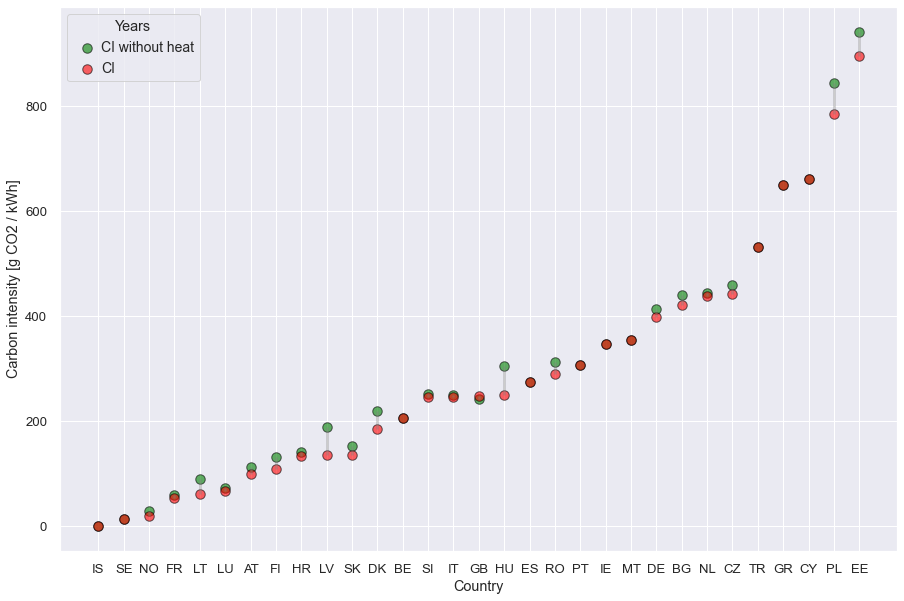

In [44]:
CI_compar['CI_without_heat'] = CI_without_heat.loc[['2018']].transpose()
CI_compar['CI'] = CI.loc[['2018']].transpose()


# Reorder it following the values of the first value:
ordered_df = CI_compar.sort_values(by='CI', ascending=True)
my_range=range(1,len(CI_compar.index)+1)

fig, ax = plt.subplots(1,1)

# The vertical plot is made using the vline function
ax.vlines(x=my_range, ymin=ordered_df['CI_without_heat'], ymax=ordered_df['CI'], color='grey', alpha=0.4, linewidths=2.5)

ax.scatter(my_range, ordered_df['CI_without_heat'],  color='green', alpha=0.6 , label='CI without heat',s=90,edgecolor='black')
ax.scatter(my_range, ordered_df['CI'],  color='red', alpha=0.6 , label='CI',s=90,edgecolor='black')
#ax.scatter(my_range , ordered_df['2018'],  color='skyblue', alpha=0.6, label='2018',s=90,edgecolor='black')
#plt.scatter(my_range, ordered_df['2010'],  color='green', alpha=0.4 , label='2010',s=90,edgecolor='black')


handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels,  loc='upper left',
                   handletextpad=0., columnspacing=0.5, ncol=1,
                   title='Years', fontsize=14, frameon=True)
 
# Add title and axis names

ax.set_xlabel('Country')
ax.set_ylabel('Carbon intensity [g CO2 / kWh]')

ax.set_xticks(my_range)
ax.set_xticklabels(ordered_df.index)

# unaing pass to not print the return from set_xticks and ...
pass

In [45]:
fig.savefig(os.path.join(output_directory_path + '/_CO2_intensity_comparing_without_heat.png'))

# Export final CI to csv

In [46]:
CI.to_csv(processed_directory_path + '/CI_top_down_methode.csv')
CI.to_csv(output_directory_path + '/CI_top_down_methode.csv')

In [47]:
CI_without_heat.to_csv(processed_directory_path + '/CI_top_down_methode_without_heat.csv')
CI_without_heat.to_csv(output_directory_path + '/CI_top_down_methode_without_heat.csv')